In [3]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [4]:
# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data (important!)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Show the shape of data
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test set: {x_test.shape}, Labels: {y_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set: (60000, 28, 28), Labels: (60000,)
Test set: (10000, 28, 28), Labels: (10000,)


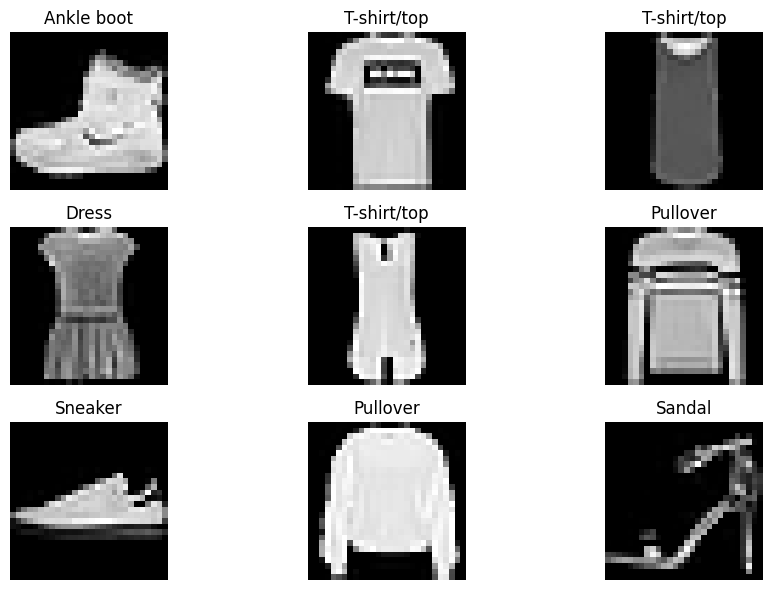

In [5]:
# Map class labels to names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display the first 9 images with labels
plt.figure(figsize=(10, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# to see the vector of inputs to our ML model
sample_image = x_train[0]
sample_label = y_train[0]

# Flatten the image
flattened_vector = sample_image.flatten()

print(f"Original shape: {sample_image.shape}")
print(f"Flattened shape: {flattened_vector.shape}")
print(f"Label: {class_names[sample_label]}")

Original shape: (28, 28)
Flattened shape: (784,)
Label: Ankle boot


In [9]:
# Print the flattened input vector
# This shows the exact numeric input that our neural network will receive for that image.
np.set_printoptions(precision=2, linewidth=150)
# print(flattened_vector)
print(flattened_vector.reshape(-1,28))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.05 0.29 0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.14 0.53 0.5  0.24 0.21 0.   0.   0.   0.   0.01 0.02 0.   0.   0.01]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.   0.4  0.8  0.69 0.53 0.56 0.48 0.09 0.   0.   0.   0.   0.05 0.04 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.61 0.93 0.81 0.7  0.42 0.61 0.63 0.43 0.25 0.09 0.3  0.51 0.28 0.06]

In [ ]:
# the model (with tensorflow)
model = Sequential([
    Flatten(input_shape=(28, 28)),           # Flatten the 28x28 images to 1D
    Dense(128, activation='relu'),           # First hidden layer
    Dense(64, activation='relu'),            # Second hidden layer
    Dense(10, activation='softmax')          # Output layer (10 classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compile
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),   # because labels are integers (not one-hot)
    metrics=['accuracy']
)

In [ ]:
# train
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,   # Reserve 10% of training data for validation
    verbose=2
)

Epoch 1/10
1688/1688 - 7s - 4ms/step - accuracy: 0.8614 - loss: 0.3803 - val_accuracy: 0.8720 - val_loss: 0.3537
Epoch 2/10
1688/1688 - 10s - 6ms/step - accuracy: 0.8766 - loss: 0.3356 - val_accuracy: 0.8700 - val_loss: 0.3558
Epoch 3/10
1688/1688 - 6s - 4ms/step - accuracy: 0.8825 - loss: 0.3154 - val_accuracy: 0.8770 - val_loss: 0.3428
Epoch 4/10
1688/1688 - 5s - 3ms/step - accuracy: 0.8898 - loss: 0.2953 - val_accuracy: 0.8637 - val_loss: 0.3778
Epoch 5/10
1688/1688 - 11s - 7ms/step - accuracy: 0.8960 - loss: 0.2797 - val_accuracy: 0.8875 - val_loss: 0.3071
Epoch 6/10
1688/1688 - 11s - 6ms/step - accuracy: 0.8995 - loss: 0.2699 - val_accuracy: 0.8838 - val_loss: 0.3221
Epoch 7/10
1688/1688 - 10s - 6ms/step - accuracy: 0.9044 - loss: 0.2568 - val_accuracy: 0.8800 - val_loss: 0.3314
Epoch 8/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9061 - loss: 0.2489 - val_accuracy: 0.8852 - val_loss: 0.3249
Epoch 9/10
1688/1688 - 11s - 7ms/step - accuracy: 0.9094 - loss: 0.2391 - val_accuracy: 0.88

In [ ]:
# Predict labels for the test set
y_pred = model.predict(x_test)
pred_labels = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - 2ms/step - accuracy: 0.8791 - loss: 0.3437


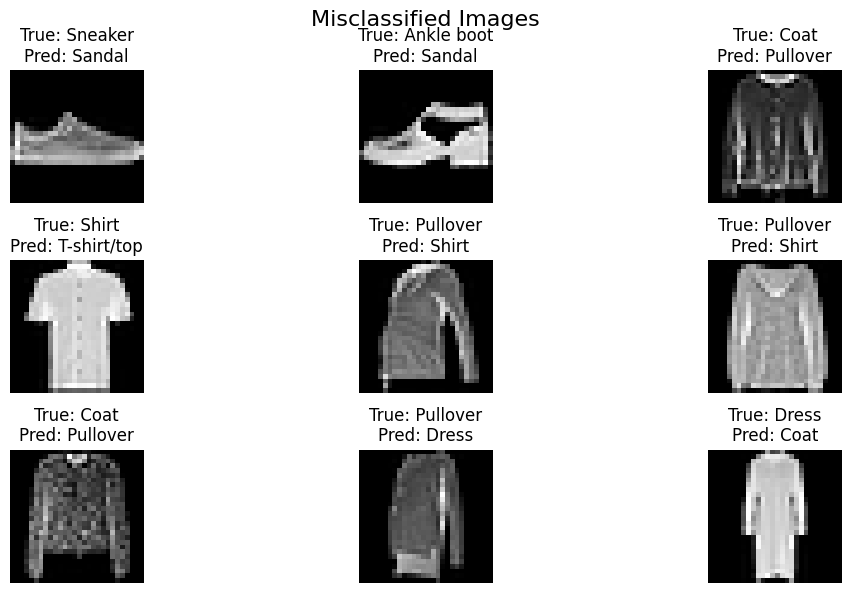

In [ ]:
# track misclassified indices
misclassified = np.where(pred_labels != y_test)[0]

# let's see some of the misclassified images
plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[pred_labels[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Misclassified Images", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 1000x800 with 0 Axes>

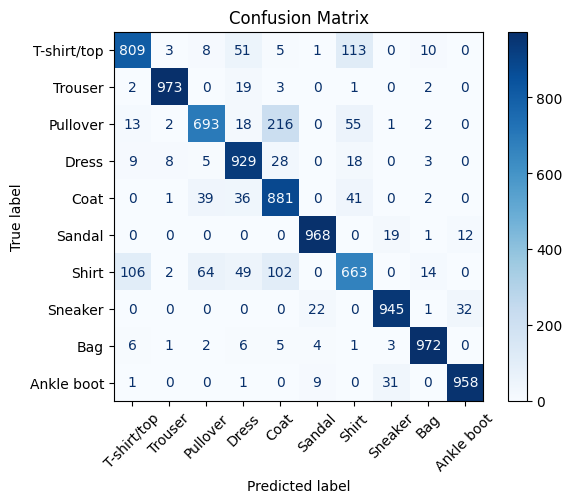

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict labels for test set
y_pred = model.predict(x_test)
pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, pred_labels)  # Compute the confusion matrix

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()